In [1]:
#regression on national auto sales
#load sets
import requests
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree

/Users/bradkittrell/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [182]:
#fred API info
fred_api_key = '58233fdf37e7936f827e64c2dc5b127e'
url = 'https://api.stlouisfed.org/fred/series/observations?series_id=TOTALNSA&api_key=58233fdf37e7936f827e64c2dc5b127e&file_type=json'
#url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'
r = requests.get(url)
json_data = r.json()
json_data_pd = pd.DataFrame(json_data)
observ = np.array(json_data_pd['observations'])

#create new dataframe for just auto sales per month
dates = [d['date'] for d in observ]
values = [d['value']for d in observ]
api_pull = pd.DataFrame(dates)
api_pull.columns = ['DATES']
api_pull['TOTALNSA'] = values




#import auto sales
sales = pd.read_csv('TOTALNSA.csv')
sales_data = pd.read_csv('TOTALNSA.csv',index_col = 0)

sales_np = api_pull.loc[:,'TOTALNSA']
sales_op = np.array(sales_np)

#sales.plot(x='DATE',y='TOTALNSA')
#plt.show()

#auto sales lagging variables
sales_op_lag0 = sales_op[12:499]
sales_op_lag1 = sales_op[11:498]
sales_op_lag3 = sales_op[9:496]
sales_op_lag6 = sales_op[6:493]
sales_op_lag12 = sales_op[0:487]
#print(len(sales_op))
#print(len(sales_op_lag1))
#print(len(sales_op_lag3))
#print(len(sales_op_lag6))
#print(len(sales_op_lag12))
#print(sales)



500


In [183]:
jan = []
for x, row in api_pull.iterrows() :
    b = []
    b = row['DATE']
    if b[5:7] == '01':
        jan.append(1)
    else:
        jan.append(0)

print(len(jan))    

KeyError: 'DATE'

In [4]:
feb = []
for x, row in sales.iterrows() :
    b = []
    b = row['DATE']
    if b[5:7] == '02':
        feb.append(1)
    else:
        feb.append(0)


In [5]:
mar = []
for x, row in sales.iterrows() :
    b = []
    b = row['DATE']
    if b[5:7] == '03':
        mar.append(1)
    else:
        mar.append(0)


In [6]:
apr = []
for x, row in sales.iterrows() :
    b = []
    b = row['DATE']
    if b[5:7] == '04':
        apr.append(1)
    else:
        apr.append(0)       

In [7]:
may = []
for x, row in sales.iterrows() :
    b = []
    b = row['DATE']
    if b[5:7] == '05':
        may.append(1)
    else:
        may.append(0)

In [8]:
jun = []
for x, row in sales.iterrows() :
    b = []
    b = row['DATE']
    if b[5:7] == '06':
        jun.append(1)
    else:
        jun.append(0)

In [9]:
jul = []
for x, row in sales.iterrows() :
    b = []
    b = row['DATE']
    if b[5:7] == '07':
        jul.append(1)
    else:
        jul.append(0)

In [10]:
aug = []
for x, row in sales.iterrows() :
    b = []
    b = row['DATE']
    if b[5:7] == '08':
        aug.append(1)
    else:
        aug.append(0)

In [11]:
sep = []
for x, row in sales.iterrows() :
    b = []
    b = row['DATE']
    if b[5:7] == '09':
        sep.append(1)
    else:
        sep.append(0)

In [12]:
octo = []
for x, row in sales.iterrows() :
    b = []
    b = row['DATE']
    if b[5:7] == '10':
        octo.append(1)
    else:
        octo.append(0)        

In [13]:
nov = []
for x, row in sales.iterrows() :
    b = []
    b = row['DATE']
    if b[5:7] == '11':
        nov.append(1)
    else:
        nov.append(0)  

In [14]:
dec = []
for x, row in sales.iterrows() :
    b = []
    b = row['DATE']
    if b[5:7] == '12':
        dec.append(1)
    else:
        dec.append(0)
                

In [15]:
month = np.column_stack((jan[12:499],mar[12:499],may[12:499],nov[12:499],sales_op_lag1,sales_op_lag3,sales_op_lag6,sales_op_lag12))

#print(len(month))



month_array = sm.add_constant(month)


model = sm.OLS(sales_op_lag0,month_array)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     226.1
Date:                Wed, 27 Sep 2017   Prob (F-statistic):          3.87e-157
Time:                        19:36:32   Log-Likelihood:                -2946.5
No. Observations:                 487   AIC:                             5911.
Df Residuals:                     478   BIC:                             5949.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.6394     33.204      2.730      0.0

In [16]:
sales['January'] = jan
sales['February'] = feb
sales['March'] = mar
sales['April'] = apr
sales['May'] = may
sales['June']= jun
sales['July'] = jul
sales['August'] = aug
sales['September'] = sep
sales['October'] = octo
sales['November'] = nov
sales['December'] = dec
sales_rev = sales[12:499]
sales_rev.loc[:,'1_mo_lag'] = sales_op_lag1
sales_rev.loc[:,'3_mo_lag'] = sales_op_lag3
sales_rev.loc[:,'6_mo_lag'] = sales_op_lag6
sales_rev.loc[:,'12_mo_lag'] = sales_op_lag12





/Users/bradkittrell/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/bradkittrell/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
np.random.seed(999)
ran_list = [np.random.randint(1,488) for i in range(1,488)]
sales_rev.loc[:,'RAND'] = ran_list
print(sales_rev.head())

          DATE  TOTALNSA  January  February  March  April  May  June  July  \
12  1977-01-01     969.9        1         0      0      0    0     0     0   
13  1977-02-01    1092.1        0         1      0      0    0     0     0   
14  1977-03-01    1451.1        0         0      1      0    0     0     0   
15  1977-04-01    1354.4        0         0      0      1    0     0     0   
16  1977-05-01    1377.1        0         0      0      0    1     0     0   

    August  September  October  November  December  1_mo_lag  3_mo_lag  \
12       0          0        0         0         0    1061.8    1129.4   
13       0          0        0         0         0     969.9    1084.4   
14       0          0        0         0         0    1092.1    1061.8   
15       0          0        0         0         0    1451.1     969.9   
16       0          0        0         0         0    1354.4    1092.1   

    6_mo_lag  12_mo_lag  RAND  
12    1162.3      885.2   449  
13    1026.1      994.

/Users/bradkittrell/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/bradkittrell/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
test_set = sales_rev[sales_rev['RAND']>90]
hold_out_set = sales_rev[sales_rev['RAND']<=90]
print(len(test_set)/len(sales_rev))

0.7823408624229979


In [19]:
x = sm.add_constant(test_set[['January','March','May','June','July','August','September','October','November','1_mo_lag','3_mo_lag','12_mo_lag']])
model = sm.OLS(test_set['TOTALNSA'],x)
results = model.fit()
print(results.summary())
coef = results.params
print(coef.head())

                            OLS Regression Results                            
Dep. Variable:               TOTALNSA   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     146.2
Date:                Wed, 27 Sep 2017   Prob (F-statistic):          7.38e-132
Time:                        19:36:33   Log-Likelihood:                -2270.1
No. Observations:                 381   AIC:                             4566.
Df Residuals:                     368   BIC:                             4617.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.6819     33.663      3.258      0.0

In [20]:
hold_out_setar = np.array(hold_out_set.loc[:,['January','March','May','June','July','August','September','October','November','1_mo_lag','3_mo_lag','12_mo_lag']])



params_array = np.array(coef[1:14])
params_arrayc = np.array(coef[0])


model_n=[]
actual = np.array(hold_out_set['TOTALNSA'])

for i in hold_out_setar:
    model_n.append(sum(params_array*i)+params_arrayc)
    
resid = actual - model_n
residsq = resid**2
avgresidsq = np.mean(residsq)
se = math.sqrt(avgresidsq)
print(se)    
        
            



108.91755972606492


In [21]:
# regression function
def regression(x,y):
    add_c = sm.add_constant(y)
    model = sm.OLS(x,add_c)
    results = model.fit()
    return print(results.summary())

testx = test_set['TOTALNSA']
testy = test_set[['January','March','May','June','July','August','September','October','November','1_mo_lag','3_mo_lag','12_mo_lag']]

#regression(testx,testy)

In [22]:
def regression_params(x,y):
    add_c = sm.add_constant(y)
    model = sm.OLS(x,add_c)
    results = model.fit()
    coeff = results.params
    return coeff

In [23]:
def regression_predict(x,y):
    add_c = sm.add_constant(y)
    model = sm.OLS(x,add_c)
    results = model.fit()
    ypred = results.predict(add_c)
    return ypred

In [24]:
# returns standard error of regression
def stderr(observ,data,params_var,params_const):
    m = []
    observ_array = np.array(observ)
    for i in data:
        m.append(sum(params_var*i)+params_const)
    dif = observ_array - m    
    dif_sq = dif**2
    dif_sq_avg = np.mean(dif_sq)
    std_err = math.sqrt(dif_sq_avg)
    return print('Standard Error: '+ str(round(std_err,3)))


In [25]:
obs = hold_out_set['TOTALNSA']
set_test = np.array(hold_out_set.loc[:,['January','March','May','June','July','August','September','October','November','1_mo_lag','3_mo_lag','12_mo_lag']])
variables = np.array(coef[1:14])
constant = np.array(coef[0])

stderr(obs,set_test,variables,constant)


Standard Error: 108.918


In [26]:
fullx = test_set['TOTALNSA']
fully = test_set[['January','March','May','June','July','August','September','October','November','1_mo_lag','3_mo_lag','12_mo_lag']]
full_obs = sales_rev['TOTALNSA']
full_data = sales_rev[['January','March','May','June','July','August','September','October','November','1_mo_lag','3_mo_lag','12_mo_lag']]

regression(full_obs,full_data)
pred_values = regression_predict(full_obs,full_data)



                            OLS Regression Results                            
Dep. Variable:               TOTALNSA   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     172.5
Date:                Wed, 27 Sep 2017   Prob (F-statistic):          2.72e-164
Time:                        19:36:33   Log-Likelihood:                -2918.5
No. Observations:                 487   AIC:                             5863.
Df Residuals:                     474   BIC:                             5918.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.2327     30.665      3.758      0.0

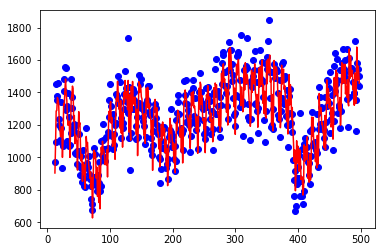

In [31]:
dates = np.array(sales_rev['DATE'])

plt.plot(sales_rev['TOTALNSA'],'bo')
plt.plot(pred_values,'r-')
plt.show()

In [1]:
X = sales_rev[['January','March','May','June','July','August','September','October','November','1_mo_lag','3_mo_lag','12_mo_lag']]
Y = sales_rev['TOTALNSA']


X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state=999)
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('R^2: {0:.3f}'.format(reg.score(X_test, Y_test)))
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error: {0:.3f}".format(rmse))

NameError: name 'sales_rev' is not defined

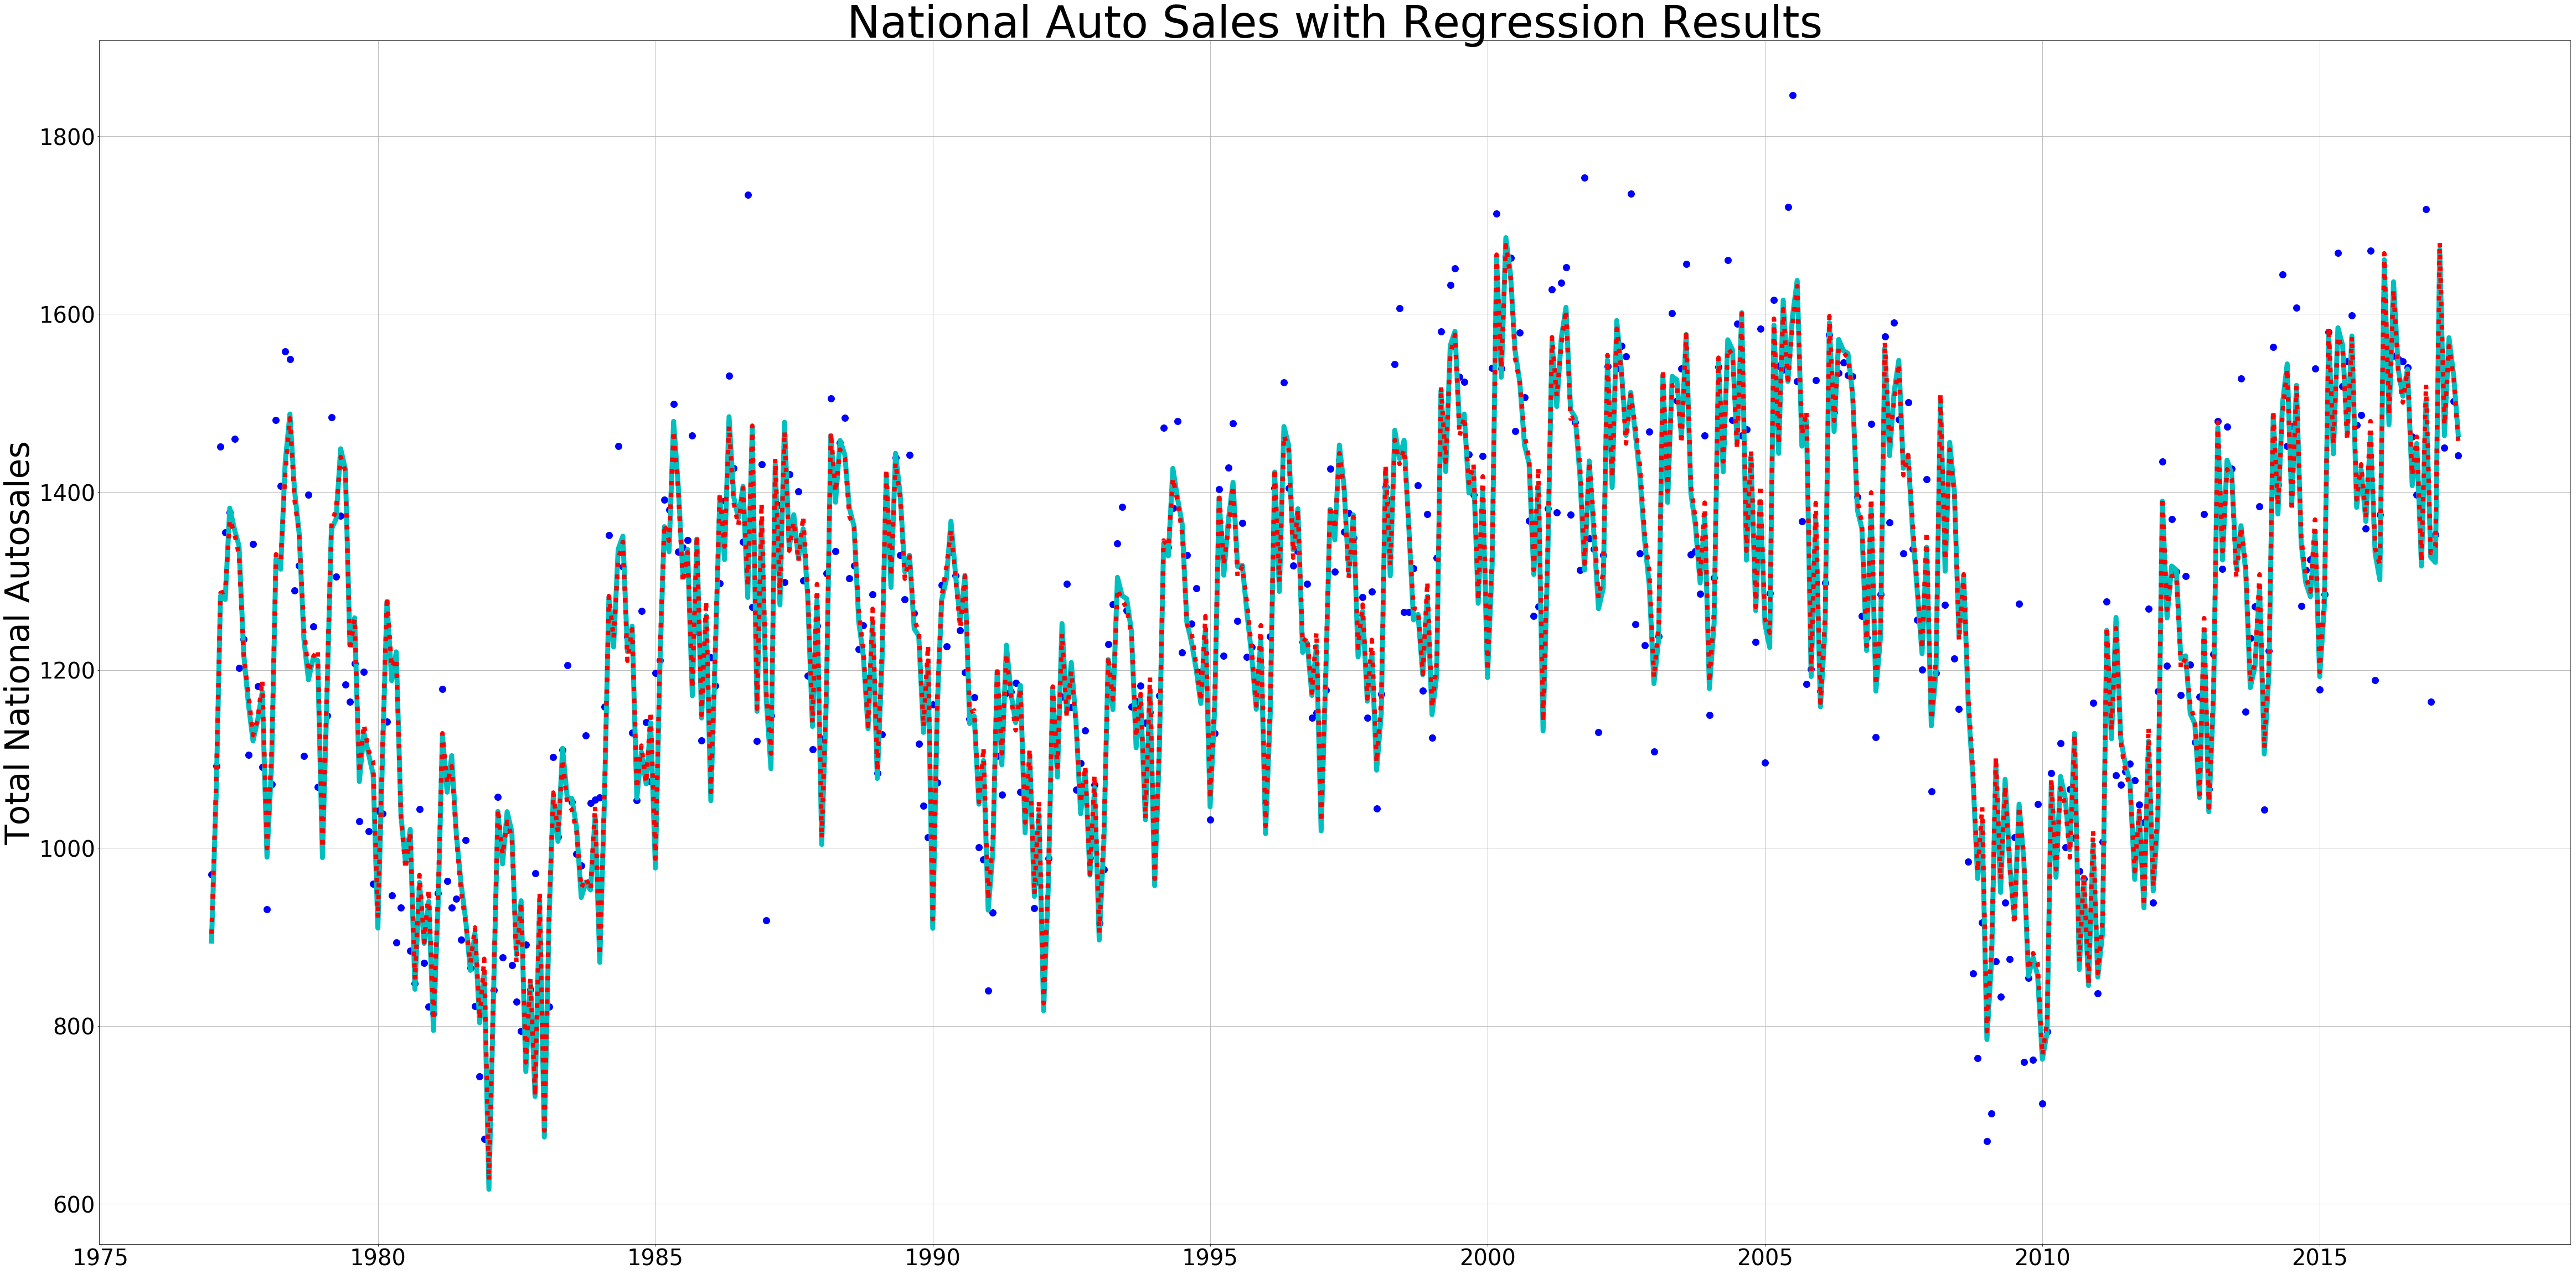

In [114]:
plt.figure(figsize=(80,40))
plt.title('National Auto Sales with Regression Results',fontsize=80)
plt.plot_date(sales_rev['DATE'],Y,'bo',markersize = 12)
plt.plot_date(sales_rev['DATE'],reg.predict(X),'c-',linewidth = 9)
plt.plot_date(sales_rev['DATE'],pred_values,'r:',linewidth = 8)
plt.ylabel('Total National Autosales',fontsize = 60)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.grid(b='on')
plt.show()